<center><b>Charged particle above fixed oppositely charged ring</b></center>

If the particle is placed, on axis, a distance z above the centre of the ring and released, the force on the particle can be found by integrating around the ring.

<center>$ \mathbf{F} = - \int \frac{q(\mathbf{R-r})}{4\pi\epsilon_0 |\mathbf{R-r}|^3} dQ$</center>

In the case that z << r, the radius of the ring, then the force is approximately proportional the displacement. Hence SHM will occur. Otherwise the motion produced is non-trivial, especially if the particle is placed off-axis. The on-axis result:

<center>$ \mathbf{F}_z = - \int \frac{qz}{4\pi\epsilon_0}(r^2+z^2)^{-3/2} dQ = - \frac{qQ}{4\pi\epsilon_0}z\ (r^2+z^2)^{-3/2}$</center>

<center> For $z \ll r, \ \ \ \mathbf{F}_z \approx - \frac{qQ}{4\pi\epsilon_0r^3}z = -\omega_{0}^2z$</center>

Using the above, it can be noted that for 2 fixed particles the linear restoring force occurs at all angles normal to the line connecting them. A charged particle in this plane, close to the midpoint, will then be capable of circular motion about the midpoint. However as the distance to the midpoint increases, z is not longer << r and the force no longer proportional to z, this will mean that the orbits will no longer close.

Importing numpy along with charge_module which contains the Animation class created for this notebook along with plotter for the electric field on-axis. Using %matplotlib notebook allows interactive plots and animations within the notebook

In [1]:
import numpy as np
import charge_module as cm

from pycav import display

Time stepping of the particle position is done via a 4th order RK method

The acceleration caused by the charged ring (which is modelled as point particle sections as a approximation to the integration required) for a unit mass:

<center>$ \mathbf{F} = - \sum_i \frac{q(\mathbf{R-r})}{4\pi\epsilon_0 |\mathbf{R-r}|^3} Q_i$</center>

In [3]:
def a(R,ring_r,ring_steps,q):
	# Function to calculate the acceleration of the particle(s) at position R
	# R - position vector of the the particle(s)
	# ring_r -  radius of the charged ring
	# q - ratio of the charge on the particle to that on the ring
	# ring_steps - Number of sections of ring considered

	# Charge density of the ring
	rho = q/(2*np.pi*ring_r)

	# Azimuthal angle steps
	phi_h = 2*np.pi/float(ring_steps)
	
	total_acc = np.array((0.0,0.0,0.0))
	for i in range(ring_steps):
		# Azimuthal angle
		phi = i*phi_h
		# Relative position vector of particle to element of ring dq
		P = R-np.array((ring_r*np.cos(phi),ring_r*np.sin(phi),0))
	
		# Magnitude of the relative position vector
		P_mag = np.linalg.norm(P)

		acc = -ring_r*phi_h*rho*P/(4*np.pi*P_mag**3)

		total_acc = total_acc + acc

	return total_acc

Function to calculate the SHM frequency found if the displacement of the particle is assumed to be much less than the radius of the ring.

In [4]:
def shm_freq(ring_r,q):
	return (q/(4*np.pi*ring_r**3))**0.5

Animation object, contains the necessary methods to create an interactive animation of the motion of the charged particle near the ring. Sliders are introduced to modify parameters and a run button which will restart the animation for these new parameters. The RK4 routine is run before producing the plotting to allow for a smooth animation. Also contains if statements for when the number of ring elements is set to 2 for the later investigation

Contains the necessary initial parameters and creates an Animation object for the user to interact with. Off axis starting positions can be investigated by changing the R vector, where the components represent (x,y,z), below.

In [5]:
# initial conditions
# Particle position and velocity
R = np.array((0.0,0.0,0.01))
V = np.array((0.0,0.0,0.0))

# Ring radius
ring_r = 1.0
# Ring sections
ring_steps = 25
# Charge factor = qQ/epsilon_0
q = 10000.0

# Time step
h = 10.0**-3
N = 1000

# Animation frame change
N_output = 10

Anim = cm.Animation(a,q,ring_r,ring_steps,h,N,N_output)
Anim.create_sliders(R,V)

In [5]:
animate = display.create_animation(Anim.animate, temp = True)
display.display_animation(animate)

The left hand graph shows the position of the particle in red and the ring in blue. The right hand graph shows the z value of the particle as a function of time (blue for actual position and red shows SHM approximation). The two sliders control the charge factor (q Q / epsilon_0) and the height from which the particle is dropped.

Note the left hand graph can be dragged to reposition the view point.

For small particle heights the SHM approximation is good but as the dropping height becomes comparable to the the size of the ring, it breaks down.

Some interesting/fun simulations to try:

    Initial position R = (0.01,0.01,0.5)
    
    Initial velocity - at rest
    
    Charge factor 10,000
    
    Ring sections 50 and ring radius 1
    
-> This produces some nice looping motion about the ring.

Now looking at the orbit of the charged particle about 2 fixed charges, at close distances there should be a linear restoring force so closed orbits must be possible. However at larger distances this should no longer hold and anharmonic behaviour will occur.

In [6]:
Anim2 = cm.Animation(a,q,ring_r,ring_steps,h,N,N_output)

Anim2.R_i = np.array((0.0,0.0,0.01))
Anim2.ring_steps = 2
Anim2.create_sliders(R,V)

Tracer On
Commencing RK4 routine...
RK4 time stepping has been completed
Run cell below to create animation inline


In [7]:
animate_2 = display.create_animation(Anim2.animate, temp = True)
display.display_animation(animate_2)

For the right hand graph, blue still represents the z displacement of the particle but red now represents the y displacement. At small particle heights you should see two sinusoids, pi/4 out of phase, as expected for circular motion.

However at larger distances (e.g. try a "particle height" of ~ 0.65) this behaviour is lost and the orbit is no longer closed c.f. Bertrand's theorem. Turn on the tracer to see the precession of the semi-major axis in the left hand plot.

By looking at the electric field on axis it is clear in which regions the SHM approx is applicable.
Using the acceleration function and the SHM frequency calculation, a graphical comparison can be made via the E_field function.

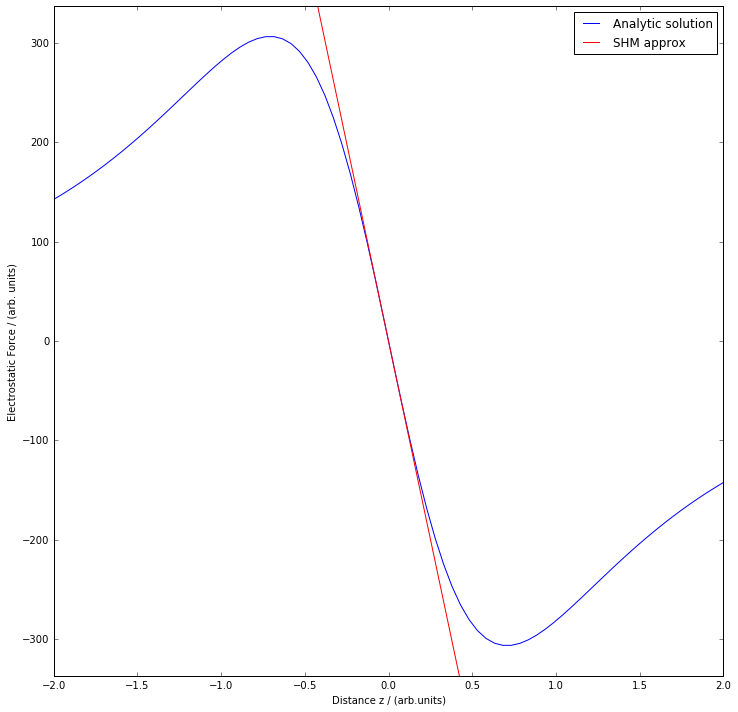

In [6]:
# Distance over which to plot in units of ring_r
z_lim = 4.0
# Step size used in plotting
z_step = 0.05

%matplotlib inline

cm.E_field(z_lim,z_step,q,ring_r)